In [1]:
%pip install causal-learn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import fisherz

# Load IHDP dataset
data = pd.read_csv("ihdp.csv")

# Check the data structure first
print("Dataset shape:", data.shape)
print("\nColumn types:")
print(data.dtypes)
print("\nFirst few rows:")
print(data.head())
print("\nMissing values:")
print(data.isnull().sum())

# Preprocessing steps:

# 1. Handle non-numeric columns
# Drop any identifier columns (like 'id' if present)
if 'id' in data.columns:
    data = data.drop('id', axis=1)

# Convert any categorical/object columns to numeric
# Check which columns are non-numeric
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print(f"\nNon-numeric columns: {list(non_numeric_cols)}")

# Option 1: Drop non-numeric columns if they're not needed
# data = data.select_dtypes(include=[np.number])

# Option 2: Convert categorical to numeric (for binary/categorical variables)
for col in non_numeric_cols:
    if data[col].dtype == 'object':
        # If it's a binary variable
        unique_vals = data[col].unique()
        if len(unique_vals) == 2:
            data[col] = pd.factorize(data[col])[0]
        else:
            # For multi-category, use one-hot encoding
            data = pd.get_dummies(data, columns=[col], drop_first=True)

# 2. Handle missing values
# Option A: Drop rows with missing values
data = data.dropna()

# Option B: Impute missing values (alternative to dropping)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # or 'median'
# data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# data = data_imputed

# 3. Ensure all data is numeric
data_array = data.astype(float).values

print(f"\nProcessed data shape: {data_array.shape}")
print(f"Data type: {data_array.dtype}")

# Now run FCI
try:
    G, edges = fci(
        data_array,
        independence_test_method=fisherz,  # Note: it's independence_test_method, not independence_test
        alpha=0.05,
        depth=-1,
        verbose=True
    )
    
    print("\nFCI algorithm completed successfully!")
    print(f"Number of edges discovered: {len(edges)}")
    
        
except Exception as e:
    print(f"\nError running FCI: {e}")
    print("\nPlease check your data preprocessing.")

Dataset shape: (747, 30)

Column types:
treatment        bool
y_factual     float64
y_cfactual    float64
mu0           float64
mu1           float64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7              int64
x8              int64
x9              int64
x10             int64
x11             int64
x12             int64
x13             int64
x14             int64
x15             int64
x16             int64
x17             int64
x18             int64
x19             int64
x20             int64
x21             int64
x22             int64
x23             int64
x24             int64
x25             int64
dtype: object

First few rows:
   treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0       True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
1      False   6.875856    7.856495  6.636059  7.562718 -1.736945 -1.802002   
2      False   2.996273    6.633

Depth=0, working on node 29: 100%|██████████| 30/30 [00:00<00:00, 638.03it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 ind 3 | () with p-value 0.556672

0 ind 4 | () with p-value 0.231772

0 dep 5 | () with p-value 0.005942

0 dep 6 | () with p-value 0.016781

0 ind 7 | () with p-value 0.558786

0 dep 8 | () with p-value 0.003895

0 ind 9 | () with p-value 0.063269

0 dep 10 | () with p-value 0.005462

0 ind 11 | () with p-value 0.918332

0 ind 12 | () with p-value 0.741274

0 dep 13 | () with p-value 0.000043

0 dep 14 | () with p-value 0.038130

0 ind 15 | () with p-value 0.611337

0 ind 16 | () with p-value 0.906759

0 ind 17 | () with p-value 0.540124

0 dep 18 | () with p-value 0.003177

0 ind 19 | () with p-value 0.900779

0 ind 20 | () with p-value 0.102002

0 dep 21 | () with p-value 0.010330

0 dep 22 | () with p-value 0.042704

0 ind 23 | () with p-value 0.544880

0 dep 24 | () with p-value 0.007016

0 ind 25 | () with p-value 0.564956

0 dep 26 | () with p-value 0.029216

0 dep 27 | () with p-value 0.002978

0 dep 28 |

Orienting collider: X1 *-> X2 <-* X4
Orienting collider: X1 *-> X3 <-* X4
Orienting collider: X4 *-> X5 <-* X15
Orienting collider: X9 *-> X5 <-* X11
Orienting collider: X6 *-> X7 <-* X12
Orienting collider: X8 *-> X7 <-* X12
Orienting collider: X6 *-> X8 <-* X10
Orienting collider: X7 *-> X8 <-* X10
Orienting collider: X5 *-> X9 <-* X27
Orienting collider: X8 *-> X10 <-* X12
Orienting collider: X5 *-> X11 <-* X29
Orienting collider: X7 *-> X12 <-* X10
Orienting collider: X19 *-> X13 <-* X22
Orienting collider: X11 *-> X14 <-* X18
Orienting collider: X18 *-> X14 <-* X27
Orienting collider: X5 *-> X15 <-* X14
Orienting collider: X5 *-> X15 <-* X16
Orienting collider: X11 *-> X15 <-* X16
Orienting collider: X16 *-> X15 <-* X22
Orienting collider: X14 *-> X18 <-* X20
Orienting collider: X18 *-> X21 <-* X30
Orienting collider: X20 *-> X21 <-* X30
Orienting collider: X13 *-> X22 <-* X15
Orienting collider: X13 *-> X22 <-* X25
Orienting collider: X26 *-> X24 <-* X27
Orienting collider: X22 *

FCI RESULTS SUMMARY

Graph shape: (30, 30)
Number of variables: 30

--- Edge Statistics ---
Directed edges: 13
Bidirected edges: 32
Undirected edges: 2
Partially oriented edges: 388

--- Directed Edges ---
  y_factual → treatment
  y_cfactual → treatment
  y_factual → mu0
  y_cfactual → mu0
  mu1 → mu0
  x2 → x1
  x3 → x1
  x24 → x18
  x19 → x21
  x24 → x19
  x23 → x21
  x24 → x21
  x24 → x23


/var/folders/nf/jp0j745j7cd1ndyt3fz94xdm0000gn/T/ipykernel_19762/821702178.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()



Graph saved as 'fci_graph_networkx.png'


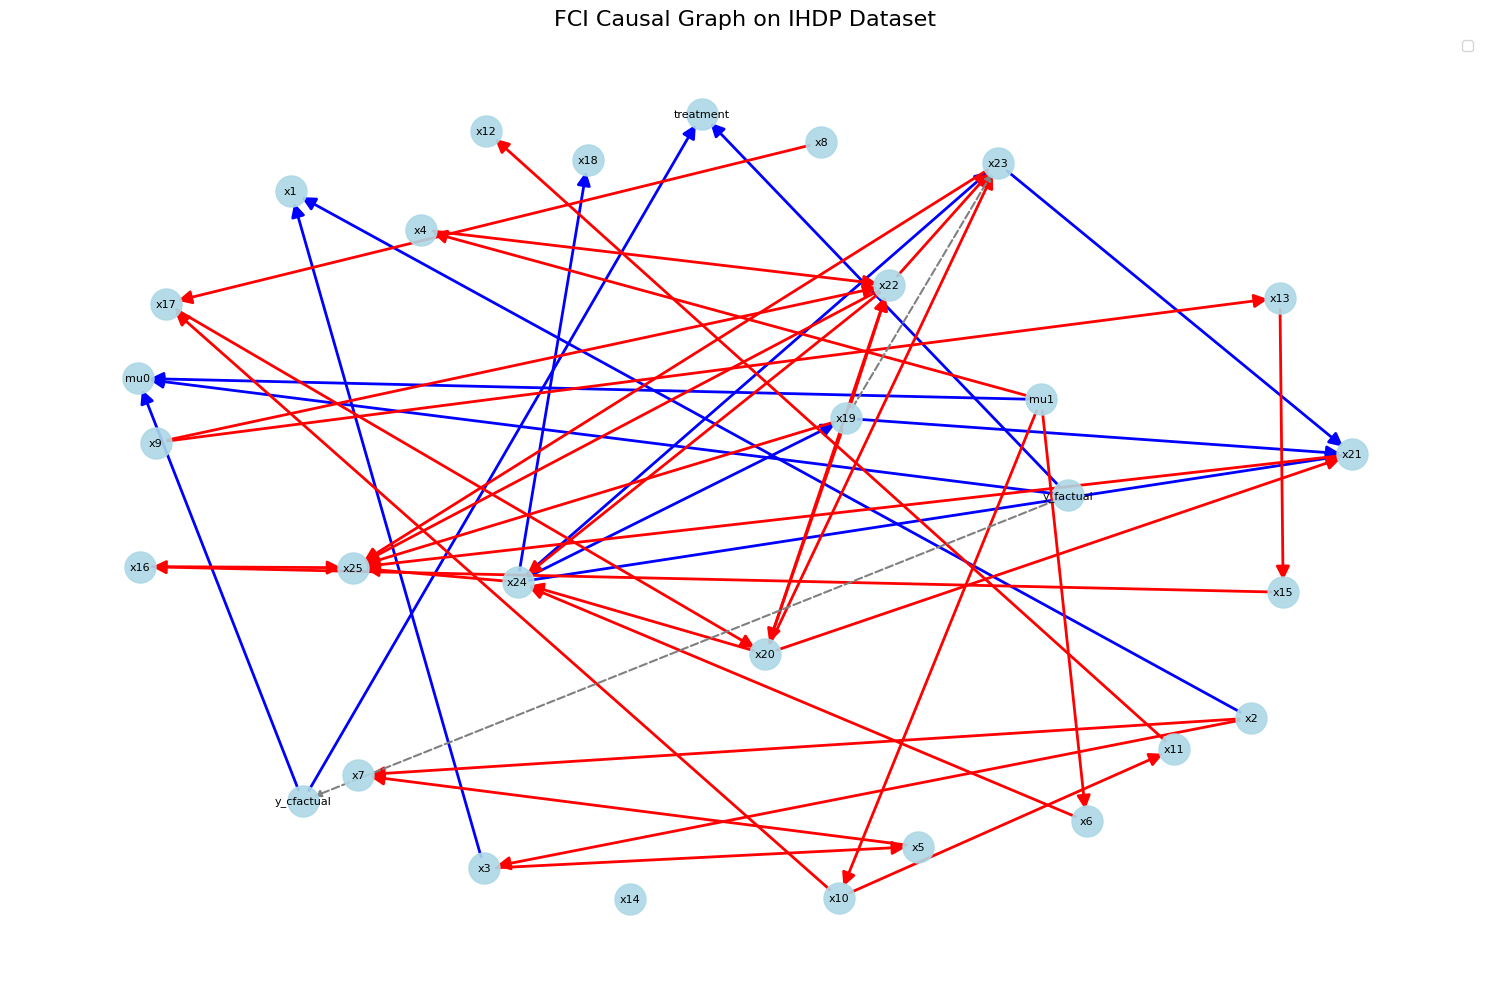


--- Saving Results ---
Adjacency matrix saved as 'fci_adjacency_matrix.csv'
Edge list saved as 'fci_edges.txt'


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from causallearn.utils.GraphUtils import GraphUtils

# After running FCI successfully
print("=" * 50)
print("FCI RESULTS SUMMARY")
print("=" * 50)

# Get the adjacency matrix
adj_matrix = G.graph

print(f"\nGraph shape: {adj_matrix.shape}")
print(f"Number of variables: {adj_matrix.shape[0]}")

# Count edge types
# In causal-learn:
# -1: no edge
# 0: o (circle)
# 1: > (arrowhead)
# 2: - (tail)

directed_edges = []
bidirected_edges = []
undirected_edges = []
partially_oriented = []

n_vars = adj_matrix.shape[0]

for i in range(n_vars):
    for j in range(i+1, n_vars):
        if adj_matrix[i, j] != -1 or adj_matrix[j, i] != -1:
            edge_i_to_j = adj_matrix[i, j]
            edge_j_to_i = adj_matrix[j, i]
            
            # Directed edge i -> j
            if edge_i_to_j == 1 and edge_j_to_i == 2:
                directed_edges.append((i, j))
            # Directed edge j -> i
            elif edge_i_to_j == 2 and edge_j_to_i == 1:
                directed_edges.append((j, i))
            # Bidirected i <-> j
            elif edge_i_to_j == 1 and edge_j_to_i == 1:
                bidirected_edges.append((i, j))
            # Undirected i -- j
            elif edge_i_to_j == 2 and edge_j_to_i == 2:
                undirected_edges.append((i, j))
            # Partially oriented (has circles)
            else:
                partially_oriented.append((i, j, edge_i_to_j, edge_j_to_i))

print(f"\n--- Edge Statistics ---")
print(f"Directed edges: {len(directed_edges)}")
print(f"Bidirected edges: {len(bidirected_edges)}")
print(f"Undirected edges: {len(undirected_edges)}")
print(f"Partially oriented edges: {len(partially_oriented)}")

print(f"\n--- Directed Edges ---")
if data.columns is not None and len(data.columns) == n_vars:
    for i, j in directed_edges:
        print(f"  {data.columns[i]} → {data.columns[j]}")
else:
    for i, j in directed_edges:
        print(f"  X{i+1} → X{j+1}")

# Visualize using NetworkX and matplotlib
plt.figure(figsize=(15, 10))

# Create directed graph
G_viz = nx.DiGraph()
G_viz.add_nodes_from(range(n_vars))

# Add edges with different styles
for i, j in directed_edges:
    G_viz.add_edge(i, j, style='solid', color='blue')

for i, j in bidirected_edges:
    G_viz.add_edge(i, j, style='solid', color='red')
    G_viz.add_edge(j, i, style='solid', color='red')

for i, j in undirected_edges:
    G_viz.add_edge(i, j, style='dashed', color='gray')

# Layout
pos = nx.spring_layout(G_viz, k=2, iterations=50, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G_viz, pos, node_color='lightblue', 
                       node_size=500, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G_viz, pos, 
                       edgelist=[(i,j) for i,j in directed_edges],
                       edge_color='blue', arrows=True, 
                       arrowsize=20, width=2, label='Directed')

if bidirected_edges:
    nx.draw_networkx_edges(G_viz, pos,
                          edgelist=[(i,j) for i,j in bidirected_edges],
                          edge_color='red', arrows=True,
                          arrowsize=20, width=2, label='Bidirected')

if undirected_edges:
    nx.draw_networkx_edges(G_viz, pos,
                          edgelist=undirected_edges,
                          edge_color='gray', style='dashed',
                          width=1.5, label='Undirected')

# Labels
if data.columns is not None and len(data.columns) == n_vars:
    labels = {i: data.columns[i] for i in range(n_vars)}
else:
    labels = {i: f'X{i+1}' for i in range(n_vars)}
    
nx.draw_networkx_labels(G_viz, pos, labels, font_size=8)

plt.title('FCI Causal Graph on IHDP Dataset', fontsize=16)
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.savefig('fci_graph_networkx.png', dpi=300, bbox_inches='tight')
print("\nGraph saved as 'fci_graph_networkx.png'")
plt.show()

# Save adjacency matrix
print(f"\n--- Saving Results ---")
np.savetxt('fci_adjacency_matrix.csv', adj_matrix, delimiter=',', fmt='%d')
print("Adjacency matrix saved as 'fci_adjacency_matrix.csv'")

# Save edge list
with open('fci_edges.txt', 'w') as f:
    f.write("Directed Edges:\n")
    for i, j in directed_edges:
        if data.columns is not None and len(data.columns) == n_vars:
            f.write(f"  {data.columns[i]} → {data.columns[j]}\n")
        else:
            f.write(f"  X{i+1} → X{j+1}\n")
    
    f.write("\nBidirected Edges:\n")
    for i, j in bidirected_edges:
        if data.columns is not None and len(data.columns) == n_vars:
            f.write(f"  {data.columns[i]} ↔ {data.columns[j]}\n")
        else:
            f.write(f"  X{i+1} ↔ X{j+1}\n")
            
print("Edge list saved as 'fci_edges.txt'")